In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import poisson
from hmmlearn import hmm

In [72]:
#Month_Value_1df = pd.read_csv("AirPassengers.csv")
df = pd.read_csv("AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [73]:
passengers = df["#Passengers"].to_numpy()
passengers

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

<ipython-input-80-f15c3cd21a93>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


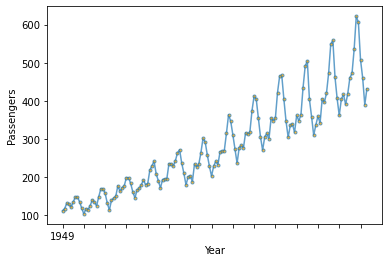

In [80]:
# Plot the sampled data
fig, ax = plt.subplots()
ax.plot(passengers, ".-", ms=6, mfc="orange", alpha=0.7)
ax.set_xticks(range(0, passengers.size, 10))
ax.set_xticklabels(range(1949, 1960, 11))
ax.set_xlabel('Year')
ax.set_ylabel('Passengers')
fig.show()

In [75]:
df['diff_1'] = df['#Passengers'].diff()
df

,Month,#Passengers,diff_1
0,1949-01,112,NaN
1,1949-02,118,6.0
2,1949-03,132,14.0
3,1949-04,129,-3.0
4,1949-05,121,-8.0
...,...,...,...
139,1960-08,606,-16.0
140,1960-09,508,-98.0
141,1960-10,461,-47.0
142,1960-11,390,-71.0


In [88]:
df = df.dropna()
df

,Month,#Passengers,diff_1
1,1949-02,118,6.0
2,1949-03,132,14.0
3,1949-04,129,-3.0
4,1949-05,121,-8.0
5,1949-06,135,14.0
...,...,...,...
139,1960-08,606,-16.0
140,1960-09,508,-98.0
141,1960-10,461,-47.0
142,1960-11,390,-71.0


<ipython-input-89-62b255eaef80>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


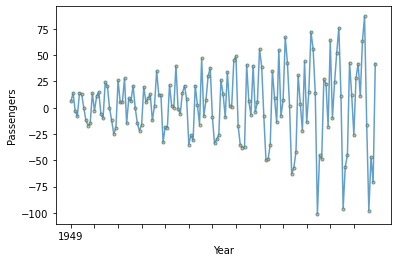

In [89]:
diff1 = df["diff_1"].to_numpy()
diff1

# Plot the sampled data
fig, ax = plt.subplots()
ax.plot(diff1, ".-", ms=6, mfc="orange", alpha=0.7)
ax.set_xticks(range(0, diff1.size, 11))
ax.set_xticklabels(range(1949, 1960, 11))
ax.set_xlabel('Year')
ax.set_ylabel('Passengers')
fig.show()

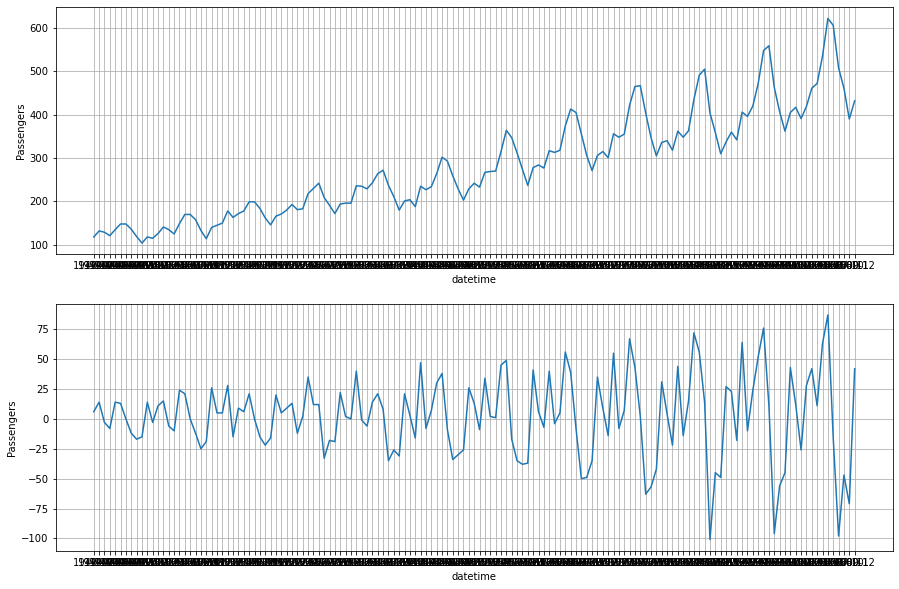

In [90]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(df["Month"], df["#Passengers"])
plt.xlabel("datetime")
plt.ylabel("Passengers")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(df["Month"], df["diff_1"])
plt.xlabel("datetime")
plt.ylabel("Passengers")
plt.grid(True)
plt.show()

In [91]:
X = df[["diff_1"]].values

In [120]:
# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)

GaussianHMM(n_components=3, n_iter=50, random_state=42)

In [121]:
Z = model.predict(X)
states = pd.unique(Z)

In [122]:
print("Unique states:")
print(states)

Unique states:
[1 0 2]


In [123]:
print("\nStart probabilities:")
print(model.startprob_)


Start probabilities:
[1.13732917e-04 9.99886267e-01 1.32980829e-27]


In [124]:
print("\nTransition matrix:")
print(model.transmat_)


Transition matrix:
[[9.44999911e-07 9.99999046e-01 8.70680564e-09]
 [8.93744270e-01 9.99149046e-06 1.06245739e-01]
 [2.25672038e-04 3.70723734e-01 6.29050594e-01]]


In [125]:
print("\nGaussian distribution means:")
print(model.means_)


Gaussian distribution means:
[[ 13.39268448]
 [  8.39596045]
 [-54.4008719 ]]


In [112]:
# # To visualise the trend of Revenue
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.pyplot import figure
# from datetime import date

# import statsmodels.api as sm
# import itertools
# figure(figsize=(15, 6), dpi=80)
# plt.plot(df.index, df['Revenue'])
# plt.title('Trend of Monthly Revenue Over Time', 
#           fontsize=20)
# plt.xticks(df.index, rotation = 90)
# plt.ylabel('Revenue (Million Dollars)')
# plt.show()

In [113]:
# scores = list()
# models = list()
# for n_components in range(1, 5):
#     for idx in range(10):  # ten different random starting states
#         # define our hidden Markov model
#         model = hmm.PoissonHMM(n_components=n_components, random_state=idx,
#                                n_iter=10)
#         model.fit(X[:, None])
#         models.append(model)
#         scores.append(model.score(X[:, None]))
#         print(f'Converged: {model.monitor_.converged}\t\t'
#               f'Score: {scores[-1]}')

# # get the best model
# model = models[np.argmax(scores)]
# print(f'The best model had a score of {max(scores)} and '
#       f'{model.n_components} components')

# # use the Viterbi algorithm to predict the most likely sequence of states
# # given the model
# states = model.predict(X[:, None])

In [126]:
# states = model.predict(X[:, None])
# # plot model states over time
# fig, ax = plt.subplots()
# ax.plot(model.lambdas_[states], ".-", ms=6, mfc="orange")
# ax.plot(passengers)
# ax.set_title('States compared to generated')
# ax.set_xlabel('State')

Text(0, 0.5, 'State From')

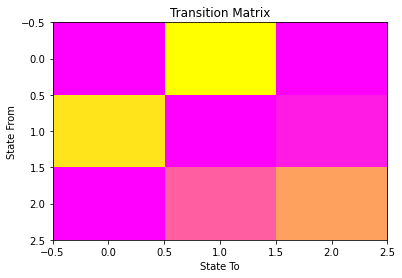

In [127]:
fig, ax = plt.subplots()
ax.imshow(model.transmat_, aspect='auto', cmap='spring')
ax.set_title('Transition Matrix')
ax.set_xlabel('State To')
ax.set_ylabel('State From')

In [128]:
# # get probabilities for each state given the data, take the average
# # to find the proportion of time in that state
# prop_per_state = model.predict_proba(passengers[:, None]).mean(axis=0)

# # earthquake counts to plot
# bins = sorted(np.unique(passengers))

# fig, ax = plt.subplots()
# ax.hist(diff_1, bins=bins, density=True)
# ax.plot(bins, np.dot(poisson.pmf(bins, model.lambdas_).T,
#                      prop_per_state[:, None]))
# ax.set_title('Histogram of Passengerss with Fitted Poisson States')
# ax.set_xlabel('Number of Passengers')
# ax.set_ylabel('Proportion')

# plt.show()

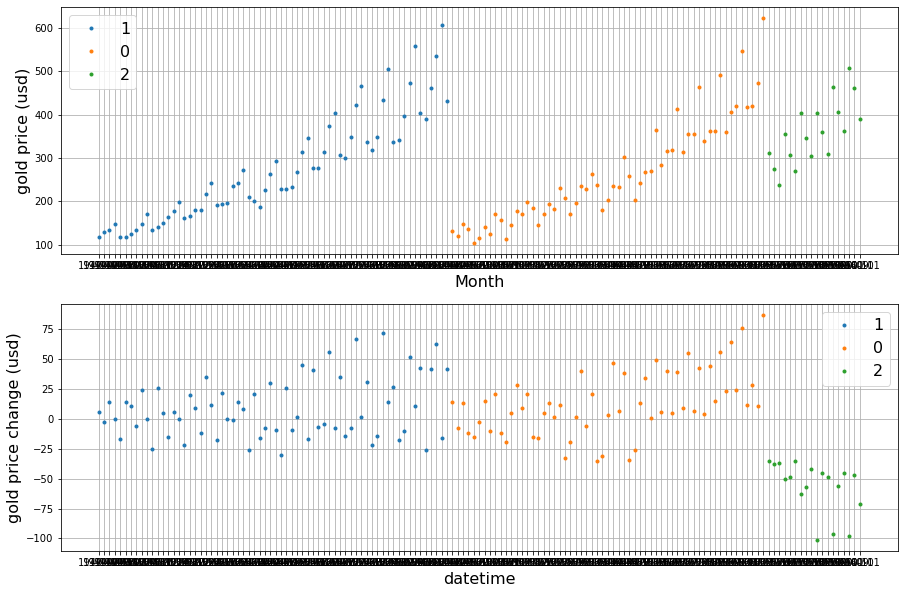

In [129]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = df["Month"].iloc[want]
    y = df["#Passengers"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("Month", fontsize=16)
plt.ylabel("gold price (usd)", fontsize=16)
plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = df["Month"].iloc[want]
    y = df["diff_1"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price change (usd)", fontsize=16)
plt.show()